# Очистка данных и обучение моделей

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('data/hackathon_income_train.csv', sep=';')

In [4]:
df_train.head(5)

,id,dt,target,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,...,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,w,first_salary_income
0,2,2024-04-30,"109324,47632478633","1465144,96",NaN,52800.0,"365346,244633755",23213.0,"97366,0",Женский,...,"1,0","0,0","57,0",0.0,"297,0","0,02702702702702703","9,0",NaN,"0,3012172807640372",NaN
1,4,2024-02-29,"25558,02866242038","303593,66",NaN,260200.0,NaN,10000.0,"32580,0",Женский,...,NaN,"0,0","707,0",67.0,"30245,0",NaN,"2,0",NaN,"0,6957996079578388",NaN
2,5,2024-02-29,"40666,753097982706","490754,01",NaN,2000000.0,NaN,90000.0,"96866,0",Женский,...,NaN,"422,0","0,0",0.0,"210322,0","0,0","20,0",NaN,"0,5159704060557002",NaN
3,6,2024-04-30,"43856,67205839414","219875,12",NaN,75000.0,NaN,75000.0,"43860,0",Мужской,...,NaN,"0,0","0,0",0.0,"7187,0","0,0","7,0",NaN,"0,4780029003784456",NaN
4,7,2024-04-30,"130420,85199232883","1750241,8449999997",NaN,1000000.0,NaN,240000.0,"83815,0",Женский,...,NaN,"0,0","84,0",0.0,"690038,0","0,0","9,0",NaN,"0,5523135540134384",NaN


In [5]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76786 entries, 0 to 76785
Data columns (total 224 columns):
 #    Column                                                                                           Dtype  
---   ------                                                                                           -----  
 0    id                                                                                               int64  
 1    dt                                                                                               object 
 2    target                                                                                           object 
 3    turn_cur_cr_avg_act_v2                                                                           object 
 4    salary_6to12m_avg                                                                                object 
 5    hdb_bki_total_max_limit                                                                          float64
 6

In [6]:
df_test = pd.read_csv('data/hackathon_income_test.csv', sep=';')

In [7]:
df_test.head(10)

,id,dt,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,...,total_sum,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,first_salary_income
0,0,2024-08-31,"805319,38",NaN,61137.47,NaN,60000.0,"159999,0",Женский,"69740,0",...,NaN,NaN,"0,0","0,0",NaN,"80228,0","0,0","1,0",NaN,NaN
1,1,2024-10-31,"306240,0",NaN,949500.00,NaN,230000.0,"108834,0",Мужской,"63513,0",...,"0,0",NaN,"0,0","0,0",0.00,"24888,0","0,0",NaN,NaN,NaN
2,3,2024-09-30,"164908,72999999998",NaN,178000.00,NaN,178000.0,"59203,0",Женский,"132,0",...,"38630,630000000005",NaN,"0,0","0,0",2363.90,"223,0",NaN,NaN,NaN,NaN
3,9,2024-10-31,"2374846,42",NaN,25500.00,"126247,44835851202",4999.0,"180906,0",Женский,"290339,0",...,NaN,"3,0","800,0","0,0",NaN,"25734,0","0,0","7,0","0,0",NaN
4,11,2024-11-30,"735902,71","47828,145620567375",60000.00,NaN,60000.0,"24922,0",Мужской,"76924,0",...,"0,0",NaN,"0,0","0,0",0.00,"1214,0","0,0","15,0",NaN,NaN
5,12,2024-11-30,"1780817,36",NaN,1916000.00,NaN,NaN,"63038,0",Женский,"129995,0",...,NaN,NaN,"0,0","0,0",NaN,"420710,0","0,006578947368421052","13,0",NaN,NaN
6,13,2024-11-30,"741169,96",NaN,150000.00,"164648,48147631905",75000.0,"53896,0",Женский,"137249,0",...,"0,0","1,0","0,0","0,0",0.00,"227659,0",NaN,"4,0",NaN,NaN
7,15,2024-08-31,"1483016,0066666668",NaN,600000.00,NaN,600000.0,"62668,0",Мужской,"907642,0",...,"742,65",NaN,"0,0","25,0",0.00,"893351,0","0,0","23,0","751,0",NaN
8,16,2024-09-30,NaN,NaN,1240000.00,NaN,120000.0,"48659,0",Женский,"0,0",...,"0,0",NaN,NaN,NaN,0.00,"14,0",NaN,NaN,NaN,NaN
9,17,2024-10-31,NaN,NaN,386885.88,NaN,14000.0,NaN,Женский,NaN,...,NaN,NaN,NaN,NaN,669.02,"0,0",NaN,NaN,NaN,NaN


#### Сколько в train пропусков?

In [8]:
df_train.isna().sum()

id                                                  0
dt                                                  0
target                                              0
turn_cur_cr_avg_act_v2                          17708
salary_6to12m_avg                               61911
                                                ...  
label_Above_1M_share_r1                         42776
transaction_category_supermarket_sum_cnt_d15    41852
max_balance_rur_amt_1m_af                       65653
w                                                   0
first_salary_income                             68118
Length: 224, dtype: int64

#### Из целевой переменной делаем типа str делаем float

In [9]:
df_train['target'] = df_train['target'].str.replace(",", ".").astype(np.float64)

#### Логарифмируем целевую переменную

In [10]:
df_train['target'] = np.log1p(df_train['target'])

#### Преобразовываем возвраст в целочисленный тип

In [11]:
df_train['age'] = df_train['age'].str.replace(",", ".").astype(np.float64)
df_train['age'] = df_train['age'].astype(np.float64)

#### Энкодим пол (муж - 0, жен - 1)

In [12]:
d = {'Мужской': 0, 'Женский': 1}

In [13]:
df_train['gender'] = df_train['gender'].map(d)

#### Меняем тип признаку salary_6to12m_avg и логарифмируем его

In [14]:
df_train['salary_6to12m_avg'] = df_train['salary_6to12m_avg'].str.replace(",", ".").astype(np.float64)

In [15]:
df_train['log_salary_6to12m_agg'] = np.log1p(df_train['salary_6to12m_avg'])

In [16]:
df_train['is_salary_known'] = df_train['log_salary_6to12m_agg'].notna().astype(int)

In [17]:
df_train = df_train.drop('salary_6to12m_avg', axis=1)

#### Обработаем регионы

In [18]:
df_train.adminarea.isna().sum()

np.int64(19563)

In [19]:
df_train['adminarea'] = df_train['adminarea'].fillna("unknown")

#### Заполним пропуски в per_capita_income_rur_amt медианой по региону                                 

In [20]:
df_train['per_capita_income_rur_amt'].isna().sum()

np.int64(7394)

In [21]:
df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].str.replace(',', '.').astype(np.float64)

In [22]:
income_per_area = df_train.groupby('adminarea')['per_capita_income_rur_amt'].mean()

In [23]:
df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].fillna(
    df_train['adminarea'].map(income_per_area)
)


In [24]:
df_train.isna().sum()['per_capita_income_rur_amt']

np.int64(0)

#### Просто добавим флаг для NaN в turn_other_cr_avg_act_v2

In [25]:
df_train['turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].str.replace(',', '.').astype(np.float64)

In [26]:
df_train['is_na_turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].isna().astype(int)

In [27]:
df_train['log_turn_other_cr_avg_act_v2'] = np.log1p(df_train['turn_other_cr_avg_act_v2'])
df_train = df_train.drop('turn_other_cr_avg_act_v2', axis=1)

#### Обработаем долю транзакций в супермаркетах

In [28]:
df_train['transaction_category_supermarket_sum_cnt_m2'] = \
df_train['transaction_category_supermarket_sum_cnt_m2'].str.replace(',', '.').astype(np.float64)

In [29]:
df_train['transaction_category_supermarket_percent_cnt_2m'] = \
df_train['transaction_category_supermarket_percent_cnt_2m'].str.replace(',', '.').astype(np.float64)

In [30]:
df_train[df_train['transaction_category_supermarket_sum_cnt_m2'] == 0]
# Нет пользователей, которые не тратили бы в магазинах

,id,dt,target,turn_cur_cr_avg_act_v2,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,...,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,w,first_salary_income,log_salary_6to12m_agg,is_salary_known,is_na_turn_other_cr_avg_act_v2,log_turn_other_cr_avg_act_v2


In [31]:
df_train['transaction_category_supermarket_percent_cnt_2m'] = \
df_train['transaction_category_supermarket_percent_cnt_2m'].fillna(df_train['transaction_category_supermarket_percent_cnt_2m'].mean())

#### Обработаем количество транзакций в реторане

In [32]:
df_train['transaction_category_restaurants_sum_amt_m2'] = \
df_train['transaction_category_restaurants_sum_amt_m2'].str.replace(',', '.').astype(np.float64)

In [33]:
# Заполним в данном признаке пропуски нулями тк не все ходят в рестораны
df_train['transaction_category_restaurants_sum_amt_m2'] = df_train['transaction_category_restaurants_sum_amt_m2'].fillna(0.0)

In [34]:
df_train['log_transaction_category_restaurants_sum_amt_m2'] = np.log1p(df_train['transaction_category_restaurants_sum_amt_m2'])

In [35]:
df_train = df_train.drop('transaction_category_restaurants_sum_amt_m2', axis=1)

#### Обработаем количество транзакций по отелям

In [36]:
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].str.replace(',', '.').astype(np.float64)

df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].fillna(0.0)

df_train['log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
np.log1p(df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'])

df_train = df_train.drop('avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', axis=1)

#### Обработаем веса

In [37]:
df_train['w'] = df_train['w'].str.replace(',', '.').astype(np.float64)

## Итоговый датасет

In [38]:
df = df_train[['target', 'age', 'gender', 'log_salary_6to12m_agg', 'is_salary_known', 
    'per_capita_income_rur_amt', 'log_turn_other_cr_avg_act_v2', 'is_na_turn_other_cr_avg_act_v2', 'transaction_category_supermarket_percent_cnt_2m',
    'log_transaction_category_restaurants_sum_amt_m2', 'log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', 'w']]

In [39]:
X, y = df.drop('target', axis=1), df['target']

## Обучаем бейзлайн

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
weights_train = X_train['w']
weights_val = X_val['w']

X_train = X_train.drop('w', axis=1)
X_val = X_val.drop('w', axis=1)

In [43]:
from catboost import CatBoostRegressor, Pool

In [44]:
cat_features = ['is_salary_known', 'is_na_turn_other_cr_avg_act_v2']  

train_pool = Pool(
    data=X_train, 
    label=y_train, 
    weight=weights_train,
    cat_features=cat_features
)

valid_pool = Pool(
    data=X_val, 
    label=y_val, 
    weight=weights_val,
    cat_features=cat_features
)


model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',   
    eval_metric='MAE',     
    random_seed=42,
    verbose=100
)

# Обучаем модель
model.fit(
    train_pool,
    eval_set=valid_pool,
    early_stopping_rounds=50
)

0:	learn: 0.9375766	test: 0.9395731	best: 0.9395731 (0)	total: 147ms	remaining: 2m 26s
100:	learn: 0.6529426	test: 0.6595651	best: 0.6595651 (100)	total: 634ms	remaining: 5.64s
200:	learn: 0.6510958	test: 0.6582839	best: 0.6582839 (200)	total: 1.12s	remaining: 4.46s
300:	learn: 0.6506867	test: 0.6579674	best: 0.6579372 (290)	total: 1.6s	remaining: 3.73s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6579372364
bestIteration = 290

Shrink model to first 291 iterations.


In [45]:
#WMAE
def weighted_mean_absolute_error(y_true, y_pred, weights):
    return (weights * np.abs(y_true - y_pred)).mean()

In [46]:
y_valid = np.expm1(y_val)
y_pred = np.expm1(model.predict(X_val))
weighted_mean_absolute_error(y_valid, y_pred, weights_val)

np.float64(54835.1112015122)

In [47]:
def preprocess_test(df_train):
    df_train['age'] = df_train['age'].str.replace(",", ".").astype(np.float64)
    df_train['age'] = df_train['age'].astype(np.float64)

    d = {'Мужской': 0, 'Женский': 1}
    df_train['gender'] = df_train['gender'].map(d)
    
    df_train['salary_6to12m_avg'] = df_train['salary_6to12m_avg'].str.replace(",", ".").astype(np.float64)
    df_train['log_salary_6to12m_agg'] = np.log1p(df_train['salary_6to12m_avg'])
    df_train['is_salary_known'] = df_train['log_salary_6to12m_agg'].notna().astype(int)
    df_train = df_train.drop('salary_6to12m_avg', axis=1)

    df_train['adminarea'] = df_train['adminarea'].fillna("unknown")
    df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].str.replace(',', '.').astype(np.float64)
    income_per_area = df_train.groupby('adminarea')['per_capita_income_rur_amt'].mean()
    df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].fillna(
        df_train['adminarea'].map(income_per_area)
    )

    df_train['turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].str.replace(',', '.').astype(np.float64)
    df_train['is_na_turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].isna().astype(int)
    df_train['log_turn_other_cr_avg_act_v2'] = np.log1p(df_train['turn_other_cr_avg_act_v2'])
    df_train = df_train.drop('turn_other_cr_avg_act_v2', axis=1)

    df_train['transaction_category_supermarket_percent_cnt_2m'] = \
    df_train['transaction_category_supermarket_percent_cnt_2m'].str.replace(',', '.').astype(np.float64)
    df_train['transaction_category_supermarket_percent_cnt_2m'] = \
    df_train['transaction_category_supermarket_percent_cnt_2m'].fillna(df_train['transaction_category_supermarket_percent_cnt_2m'].mean())

    df_train['transaction_category_restaurants_sum_amt_m2'] = \
    df_train['transaction_category_restaurants_sum_amt_m2'].str.replace(',', '.').astype(np.float64)
    df_train['transaction_category_restaurants_sum_amt_m2'] = df_train['transaction_category_restaurants_sum_amt_m2'].fillna(0.0)
    df_train['log_transaction_category_restaurants_sum_amt_m2'] = np.log1p(df_train['transaction_category_restaurants_sum_amt_m2'])
    df_train = df_train.drop('transaction_category_restaurants_sum_amt_m2', axis=1)

    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].str.replace(',', '.').astype(np.float64)

    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].fillna(0.0)

    df_train['log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
    np.log1p(df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'])

    df_train = df_train.drop('avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', axis=1)
    
    return df_train[['age', 'gender', 'log_salary_6to12m_agg', 'is_salary_known', 
                     'per_capita_income_rur_amt', 'log_turn_other_cr_avg_act_v2', 'is_na_turn_other_cr_avg_act_v2', 'transaction_category_supermarket_percent_cnt_2m',
                     'log_transaction_category_restaurants_sum_amt_m2', 'log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija']]

## Model tuning

In [682]:
import optuna
def objective(trial):
    params = {
        'iterations': 5000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'loss_function': 'MAE',
        'eval_metric': 'MAE',
        'early_stopping_rounds': 100,
        'verbose': 0
    }
    
    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=valid_pool)
    
    y_pred_real = np.expm1(model.predict(X_val))
    
    
    y_val_real = np.expm1(y_val)
    wmae =  wmae = np.sum(weights_val * np.abs(y_val_real - y_pred_real)) / np.sum(weights_val)
    
    return wmae  # цель — минимизировать

In [683]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # количество проб можно увеличить
print("Лучшие параметры:", study.best_params)
print("Лучший WMAE:", study.best_value)

[I 2025-11-29 21:51:11,820] A new study created in memory with name: no-name-67fe42ce-01ca-4a72-aaab-3609b80e24cb
[I 2025-11-29 21:51:33,488] Trial 0 finished with value: 94375.41310711944 and parameters: {'learning_rate': 0.0399289446781238, 'depth': 10, 'l2_leaf_reg': 2.559132884183595}. Best is trial 0 with value: 94375.41310711944.
[I 2025-11-29 21:51:36,117] Trial 1 finished with value: 94873.21324508122 and parameters: {'learning_rate': 0.16966066527307694, 'depth': 8, 'l2_leaf_reg': 7.582872145112539}. Best is trial 0 with value: 94375.41310711944.
[I 2025-11-29 21:51:39,815] Trial 2 finished with value: 95544.1184119923 and parameters: {'learning_rate': 0.04636297226917424, 'depth': 8, 'l2_leaf_reg': 4.699221178312711}. Best is trial 0 with value: 94375.41310711944.
[I 2025-11-29 21:51:48,595] Trial 3 finished with value: 95379.53827491301 and parameters: {'learning_rate': 0.025887967224674648, 'depth': 7, 'l2_leaf_reg': 3.3256827411332215}. Best is trial 0 with value: 94375.41

Лучшие параметры: {'learning_rate': 0.15972218000051944, 'depth': 9, 'l2_leaf_reg': 9.173180206569784}
Лучший WMAE: 93939.69774729964


In [687]:
best_params = study.best_params
model = CatBoostRegressor(**best_params)

model.fit(X_train, y_train)

0:	learn: 0.7027833	total: 9.09ms	remaining: 9.08s
1:	learn: 0.6792559	total: 18ms	remaining: 8.99s
2:	learn: 0.6616887	total: 25.8ms	remaining: 8.58s
3:	learn: 0.6462301	total: 33.9ms	remaining: 8.45s
4:	learn: 0.6352021	total: 41.9ms	remaining: 8.33s
5:	learn: 0.6263739	total: 49.8ms	remaining: 8.25s
6:	learn: 0.6193386	total: 57.8ms	remaining: 8.2s
7:	learn: 0.6129224	total: 66.2ms	remaining: 8.21s
8:	learn: 0.6080022	total: 74.7ms	remaining: 8.23s
9:	learn: 0.6046029	total: 84.5ms	remaining: 8.36s
10:	learn: 0.6017835	total: 92.4ms	remaining: 8.31s
11:	learn: 0.5992068	total: 101ms	remaining: 8.35s
12:	learn: 0.5970238	total: 109ms	remaining: 8.3s
13:	learn: 0.5954197	total: 117ms	remaining: 8.26s
14:	learn: 0.5938750	total: 125ms	remaining: 8.22s
15:	learn: 0.5928584	total: 133ms	remaining: 8.19s
16:	learn: 0.5918816	total: 142ms	remaining: 8.22s
17:	learn: 0.5909051	total: 151ms	remaining: 8.23s
18:	learn: 0.5901366	total: 159ms	remaining: 8.23s
19:	learn: 0.5891487	total: 167ms	

In [688]:
y_valid = np.expm1(y_val)
y_pred = np.expm1(model.predict(X_val))
weighted_mean_absolute_error(y_valid, y_pred, weights_val)

np.float64(53328.71867474054)

In [686]:
W = X['w']
X_full = X.drop('w', axis=1)

In [618]:
full_train_pool = Pool(
    data=X_full,
    label=y,   
    weight=W
)

model.fit(full_train_pool)

0:	learn: 1.0151963	total: 8.91ms	remaining: 8.9s
1:	learn: 0.9652126	total: 18ms	remaining: 8.97s
2:	learn: 0.9253043	total: 26.4ms	remaining: 8.78s
3:	learn: 0.8943632	total: 34.9ms	remaining: 8.7s
4:	learn: 0.8719888	total: 42.5ms	remaining: 8.46s
5:	learn: 0.8550660	total: 50.5ms	remaining: 8.37s
6:	learn: 0.8409630	total: 58.9ms	remaining: 8.36s
7:	learn: 0.8308391	total: 67ms	remaining: 8.31s
8:	learn: 0.8216236	total: 75.4ms	remaining: 8.3s
9:	learn: 0.8145768	total: 83.9ms	remaining: 8.31s
10:	learn: 0.8093924	total: 91.7ms	remaining: 8.24s
11:	learn: 0.8048901	total: 100ms	remaining: 8.25s
12:	learn: 0.8014408	total: 108ms	remaining: 8.2s
13:	learn: 0.7984284	total: 116ms	remaining: 8.17s
14:	learn: 0.7957296	total: 124ms	remaining: 8.14s
15:	learn: 0.7940452	total: 132ms	remaining: 8.1s
16:	learn: 0.7923469	total: 140ms	remaining: 8.09s
17:	learn: 0.7908619	total: 149ms	remaining: 8.12s
18:	learn: 0.7898390	total: 157ms	remaining: 8.12s
19:	learn: 0.7886477	total: 166ms	remai

In [619]:
df_test = pd.read_csv('data/hackathon_income_test.csv', sep=';')
df = preprocess_test(df_test)
y_pred = model.predict(df)
y_pred = np.expm1(y_pred)
df_test['target'] = y_pred
df_test[['id', 'target']].set_index('id').to_csv('submission2.csv', decimal='.', sep=',')

## Объяснение работы модели

In [48]:
import matplotlib.pyplot as plt

In [49]:

train_pool = Pool(
    data=X_train, 
    label=y_train, 
    weight=weights_train,
    cat_features=cat_features,
    feature_names=list(X_train.columns)
)

model.plot_tree(
    tree_idx=0,
    pool=valid_pool
)

plt.show()

In [620]:
model.save_model("best_catboost_model.onnx", format="onnx")

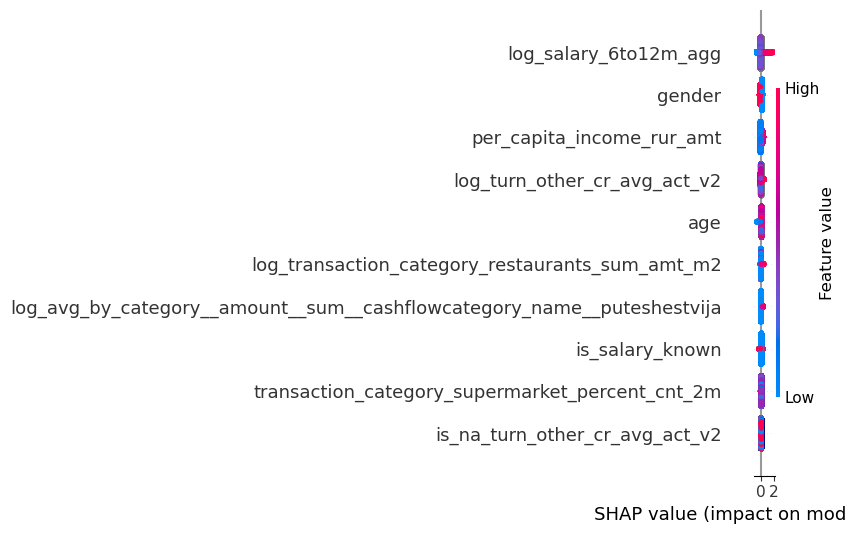

In [711]:
import shap

# Если модель обучена на Pool, важно указать cat_features
pool = Pool(X_train, cat_features=cat_features)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pool)

# Summary plot
shap.summary_plot(shap_values, X_train)

In [630]:
df_train['avg_by_category__amount__sum__cashflowcategory_name__vydacha_nalichnyh_v_bankomate'] = \
df_train['avg_by_category__amount__sum__cashflowcategory_name__vydacha_nalichnyh_v_bankomate'].str.replace(',', '.').astype(np.float64)

In [635]:
df_train['avg_by_category__amount__sum__cashflowcategory_name__vydacha_nalichnyh_v_bankomate'].mean()

np.float64(44123.98253908007)